In [12]:
from random import randint
import pandas as pd
import numpy as np
import numpy as np
import glob
import os
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def load_image_from_png():
    output={}
    cwd = os.getcwd()
    pattern="%s/train_images/*.png"
    paths=glob.glob(pattern % cwd)
    paths.sort()
    for path in paths:
        name=int(os.path.basename(path).split(".")[0])
        img = skimage.io.imread(path)
        output[name]=img
    return output

In [36]:
def aug(images):
    #loading required data
    print("loading nummertrain")
    nummertrain=np.load("nummertrain.npy")
    print("loading train csv")
    y=pd.read_csv('train.csv')
    #print("loading images")
    #images=load_image_from_png()

    new_nummertrain=[]
    new_imgs=[]
    next_image=0
    current_image=0
    print("Starting the main part")
    while(next_image < y.shape[0]):
        img_name=int(y.loc[next_image,'FileName'].split(".")[0])
        top=[]
        bottom=[]
        right=[]
        left=[]
        count=0
        while (img_name == int(y.loc[current_image,'FileName'].split(".")[0])):
                top.append(y.loc[current_image,'Top'])
                bottom.append(y.loc[current_image,'Top'] + y.loc[current_image,'Height'])
                left.append(y.loc[current_image,'Left'])
                right.append(y.loc[current_image,'Left'] + y.loc[current_image,'Width'])
                current_image=current_image+1
                if(current_image>=y.shape[0]):
                    break
                count=count+1
        #change the if condition to specify if value of k, take in images with len k and output k+1 
        if(count == 2):
        
            #selecting a digit from the given sequence randomly
            index=randint(0,count-1)

            #coordinates for bounding boxes of the entire picture
            minTop=min(top)
            if(minTop < 0):
                minTop=0
            maxBot=max(bottom)
            if(maxBot<0):
                maxBot=0
            minLeft=min(left)
            if(minLeft<0):
                minLeft=0
            maxRight=max(right)
            if(maxRight<0):
                maxRight=0


            #coordinates for the bounding boxes of the isolated digit

            isoTop=top[index]
            if (isoTop < 0):
                isoTop=0
            isoBot=bottom[index]
            if(isoBot < 0):
                isoBot=0
            isoLeft=left[index]
            if(isoLeft < 0):
                isoLeft=0
            isoRight=right[index]
            if(isoRight < 0):
                isoRight=0

            #crop out the image 
            cropImg=images[img_name]
            cropImg=cropImg[minTop:maxBot,minLeft:maxRight]
    

            #crop out the isolated digit
            isoImg=images[img_name]
            isoImg=isoImg[minTop:maxBot,isoLeft:isoRight]

            # randomly deciding whether to append in front or back
            pos=randint(1,2)
            if(pos==1):
                finImg=np.hstack((isoImg,cropImg))
                new_imgs.append(finImg)
                temp=np.zeros(nummertrain[img_name-1].shape)
                temp[0]=nummertrain[img_name-1][index]
                for i in range(1,temp.shape[0]-1):
                    temp[i]=nummertrain[img_name-1][i-1]
                temp[temp.shape[0]-1]=nummertrain[img_name-1][nummertrain[img_name-1].shape[0] -1] + 1
                new_nummertrain.append(temp)
            else:
                finImg=np.hstack((cropImg,isoImg))
                new_imgs.append(finImg)
                temp=np.zeros(nummertrain[img_name-1].shape)
                for i in range(0,temp.shape[0]-1):
                    temp[i]=nummertrain[img_name-1][i]
                temp[count]=nummertrain[img_name-1][index]
                temp[temp.shape[0] -1]=nummertrain[img_name-1][nummertrain[img_name-1].shape[0]-1] + 1
                new_nummertrain.append(temp)

        next_image=current_image

        #plt.plot(isoLeft,isoTop,'yo')
        #plt.plot(isoLeft,isoBot,'yo')
        #plt.plot(isoRight,isoTop,'yo')
        #plt.plot(isoRight,isoBot,'yo')


        #plt.plot(minLeft,minTop,'ro')
        #plt.plot(minLeft,maxBot,'ro')
        #plt.plot(maxRight,minTop,'ro')
        #plt.plot(maxRight,maxBot,'ro')

        #plt.figure()
        #plt.imshow(finImg)

    new_nummertrain=np.array(new_nummertrain)
    new_imgs=np.array(new_imgs)
        #print("nummertrain entry : ",nummertrain[img_name-1])
        #print("new_nummertrain entry : ", temp)
        #print("new_nummertrain shape : ",new_nummertrain.shape)
    return new_nummertrain, new_imgs

In [15]:
images=load_image_from_png()

In [37]:
new_nummertrain,new_imgs=aug(images)

loading nummertrain
loading train csv
Starting the main part


In [46]:
print(new_nummertrain[0].shape)
print(new_imgs.shape)

(6,)
(128,)


[ 1.  7.  1.  0.  0.  3.]


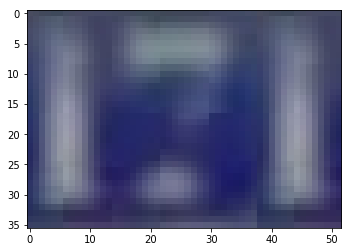

In [66]:
index=randint(0,127)
plt.imshow(new_imgs[index])
print(new_nummertrain[index])

In [53]:
nummertrain=np.load("nummertrain.npy")

In [29]:
print(nummertrain[0].shape)

(6,)
